# Econophysics

Thomas VIDAL

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 3- Study of a financial time series during the financial crisis of 2008
Let's now study the time series "BNP.PA.csv". We will work only on the open values, i.e. the second column.
On January 7, 2009, the French president announced a new support to the banks for an estimated amount of 10.5 billion euros. After two months, with all the rescue plans, we suppose that the effects can be felt. We model them with an harmonic strenght.

### 3.1 We calculate x0 as the average value over 2 months : between January 7th 2009 and March 6th 2009. Calculate the value of x0 .

x₀ = (Σ open prices between January 7th, 2009, and March 6th, 2009) / (number of trading days in the range)

In [2]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("BNP.PA.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date range
start_date = '2009-01-07'
end_date = '2009-03-06'

# Filter data within the date range
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Calculate x0 (average open price)
x0 = filtered_data['Open'].mean()

print("The value of x0 is:", x0)

The value of x0 is: 27.190116255813944


### 3.2 From this date, the asset will be drawn towards 90% of its original value, which will be calculated one year before the crisis.
### Calculate this value x by taking the average value between the dates of January 7, 2008 and February 7, 2008.

In [3]:
# Set the date range for x∞ calculation
start_date_x_inf = '2008-01-07'
end_date_x_inf = '2008-02-07'

# Filter data within the date range for x∞ calculation
filtered_data_x_inf = data[(data['Date'] >= start_date_x_inf) & (data['Date'] <= end_date_x_inf)]

# Calculate the average open price within the date range for x∞
x_inf_raw = filtered_data_x_inf['Open'].mean()

# Calculate x∞ as 90% of the average value
x_inf = 0.9 * x_inf_raw

print("The value of x∞ is:", x_inf)

The value of x∞ is: 61.38862485


### 3.3 Which value of k offers the best fit of the data with $t = (x_0 - x_\infty)\cdot e^{-kt} + x_\infty$ ?
### Precisely detail your approach.

In [4]:
import numpy as np
from scipy.optimize import curve_fit

# Define the function to fit the data
def asset_value_function(t, k):
    return (x0 - x_inf) * np.exp(-k * t) + x_inf # Cause y = 1 and m = 1 

# Create a time variable (t) based on the number of trading days since the start date
filtered_data['Time'] = (filtered_data['Date'] - pd.to_datetime(start_date)).dt.days

# Extract the time and open values as numpy arrays
time_values = filtered_data['Time'].values
open_values = filtered_data['Open'].values

# Perform the curve fitting using the least-squares method
popt, _ = curve_fit(asset_value_function, time_values, open_values)

# Extract the best-fit value of k
k_best_fit = popt[0]

print("The best-fit value of k is:", k_best_fit)

The best-fit value of k is: -0.0011090195815655227


To find the value of k that offers the best fit of the data with the given function $t = (x_0 - x_\infty)\cdot e^{-kt} + x_\infty$, we use a curve fitting technique such as the least-squares method. This approach minimizes the sum of squared differences between the observed values (actual data) and the fitted values (predicted data).

This script defines the asset_value_function, creates a time variable based on the number of trading days since the start date, and performs the curve fitting using the least-squares method provided by the scipy.optimize.curve_fit function.

### 3.4 Plot the open values and $ <x>x (t) $ on the same graph.

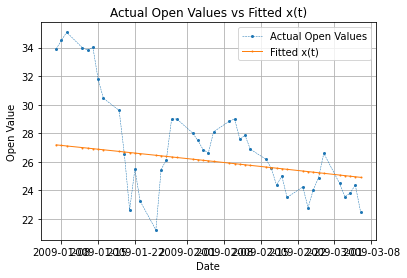

In [5]:
import matplotlib.pyplot as plt

# Calculate the fitted values using the best-fit value of k
fitted_values = asset_value_function(time_values, k_best_fit)

# Plot the actual open values
plt.plot(filtered_data['Date'], open_values, label="Actual Open Values", marker='o', markersize=2, linestyle='--', linewidth=0.5)

# Plot the fitted x(t) values
plt.plot(filtered_data['Date'], fitted_values, label="Fitted x(t)", marker='.', markersize=2, linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Open Value")
plt.title("Actual Open Values vs Fitted x(t)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### 3.5 Calculate D between January 7, 2008 and February 7, 2008. Explain your approach.

In [6]:
# Filter data within the date range for D calculation
filtered_data_D = data[(data['Date'] >= start_date_x_inf) & (data['Date'] <= end_date_x_inf)]

# Calculate daily price returns
filtered_data_D['Daily_Return'] = filtered_data_D['Open'].pct_change()

# Calculate the variance of the daily price returns
daily_return_variance = filtered_data_D['Daily_Return'].var()

# Calculate the diffusion coefficient (D)
D = 0.5 * daily_return_variance

print("The value of D is:", D)

The value of D is: 0.001415863129812272


- Step 1: Calculate daily price returns
Daily price returns are the percentage change in the open price of the asset between two consecutive trading days. It can be calculated using the formula:

$ daily return (t) = (open price(t) - open price(t-1)) / open price(t-1) $

- Step 2: Calculate the variance of the daily price returns
Variance is a measure of how spread out the daily price returns are from their mean. It can be calculated using the formula:

$ variance = Σ (daily return - mean daily return)² / (number of daily returns - 1) $

- Step 3: Calculate the diffusion coefficient (D)
The diffusion coefficient (D) can be calculated as half of the variance of the daily price returns:

$ D = 0.5 * variance $

### 3.6 Draw the envelope  t around x x t.

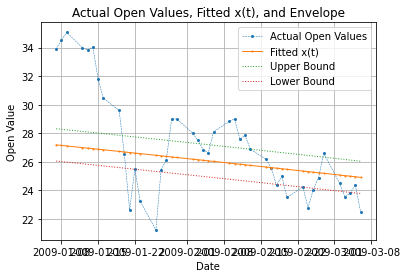

In [7]:
import numpy as np

# Calculate the constant standard deviation
m = 1
gamma = 1

# Calculate the constant standard deviation with epsilon cause D and k are close to 0
epsilon = 1e-8
std_dev = np.sqrt(np.abs(m * gamma * (D + epsilon) / (k_best_fit + epsilon)))

# Calculate the upper and lower bounds of the envelope
upper_bound = fitted_values + std_dev
lower_bound = fitted_values - std_dev

# Plot the actual open values
plt.plot(filtered_data['Date'], open_values, label="Actual Open Values", marker='o', markersize=2, linestyle='--', linewidth=0.5)

# Plot the fitted x(t) values
plt.plot(filtered_data['Date'], fitted_values, label="Fitted x(t)", marker='.', markersize=2, linestyle='-', linewidth=1)

# Plot the upper and lower bounds of the envelope
plt.plot(filtered_data['Date'], upper_bound, label="Upper Bound", linestyle=':', linewidth=1)
plt.plot(filtered_data['Date'], lower_bound, label="Lower Bound", linestyle=':', linewidth=1)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Open Value")
plt.title("Actual Open Values, Fitted x(t), and Envelope")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## 4. We will now write a program to consider all back to the average by detecting fluctuations above a gap. From now on, we study from March 6, 2009.

### 4.1 Calculcate x(t)  on a sliding window of one month.

In [8]:
import pandas as pd

# Function to compute the average open value within a sliding window of one month
def moving_average(data, window_size):
    return data['Open'].rolling(window=window_size).mean()

# Set the start date
start_date = pd.Timestamp('2009-03-06')

# Filter the data starting from the start date
data_from_start_date = data[data['Date'] >= start_date]

# Calculate the number of trading days in one month (21 days)
trading_days_in_month = 21

# Calculate the moving average using the sliding window of one month
data_from_start_date['Moving_Average'] = moving_average(data_from_start_date, trading_days_in_month)

# Display the data with the moving average
print(data_from_start_date)

           Date       Open       High        Low      Close  Adj Close  \
3996 2009-03-06  22.520000  22.799999  20.950001  21.735001  11.058839   
3997 2009-03-09  22.299999  22.690001  21.020000  22.075001  11.231834   
3998 2009-03-10  22.485001  26.650000  21.900000  26.650000  13.559607   
3999 2009-03-11  26.010000  28.900000  25.625000  27.415001  13.948844   
4000 2009-03-12  26.510000  28.440001  25.405001  28.400000  14.450013   
...         ...        ...        ...        ...        ...        ...   
7517 2022-12-06  52.250000  52.529999  51.849998  52.459999  52.459999   
7518 2022-12-07  52.349998  52.639999  51.730000  52.000000  52.000000   
7519 2022-12-08  52.259998  52.349998  51.860001  52.000000  52.000000   
7520 2022-12-09  52.299999  52.889999  51.860001  52.889999  52.889999   
7521 2022-12-12  52.790001  53.040001  52.450001  52.680000  52.680000   

          Volume  Moving_Average  
3996   8344579.0             NaN  
3997   7233057.0             NaN  
3998  

### 4.2 Calculcate $ (σ²(t)) $ on a sliding window of one month. Plot it.

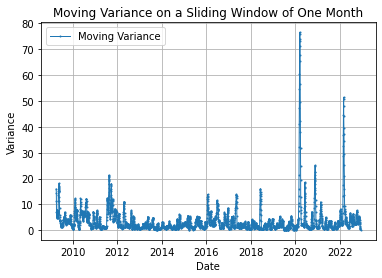

In [9]:
import matplotlib.pyplot as plt

# Function to compute the variance within a sliding window of one month
def moving_variance(data, window_size):
    return data['Open'].rolling(window=window_size).var()

# Calculate the moving variance using the sliding window of one month
data_from_start_date['Moving_Variance'] = moving_variance(data_from_start_date, trading_days_in_month)

# Drop the rows with NaN values in the Moving_Variance column
data_without_na = data_from_start_date.dropna(subset=['Moving_Variance'])

# Plot the moving variance
plt.plot(data_without_na['Date'], data_without_na['Moving_Variance'], label='Moving Variance', marker='.', markersize=2, linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("Moving Variance on a Sliding Window of One Month")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Desired x∞:  61.38862485
Obtained x∞:  61.265596999762536


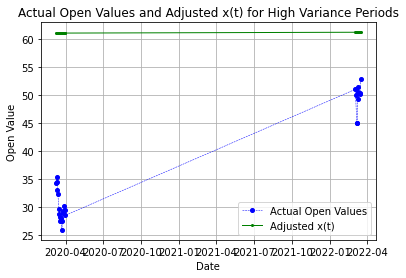

In [10]:
# Reuse previous value

x_infinity = 61.38862485

k_best_fit = 0.0011090195815655227

# 1. Identify the dates when σ²(t) > 30
high_variance_dates = data_without_na[data_without_na['Moving_Variance'] > 30]

# 2. For each of these areas, determine a value of x0
x0_values = high_variance_dates['Open'].mean()

# 3. Adjust the x(t) expression using the same value of k found for the study on 2008
def adjusted_expression(t, x0, x_infinity, k):
    return (x0 - x_infinity) * np.exp(-k * t) + x_infinity

time_values = (high_variance_dates['Date'] - start_date).dt.days
adjusted_values = adjusted_expression(time_values, x0_values, x_infinity, k_best_fit)

# 4. Study the value of x∞ desired and obtained according to each case
print("Desired x∞: ", x_infinity)
print("Obtained x∞: ", adjusted_values.iloc[-1])

# Plot the actual open values and adjusted x(t) values for the high variance periods
plt.plot(high_variance_dates['Date'], high_variance_dates['Open'], label="Actual Open Values", marker='o', markersize=4, linestyle='--', linewidth=0.5, color='blue')
plt.plot(high_variance_dates['Date'], adjusted_values, label="Adjusted x(t)", marker='.', markersize=4, linestyle='-', linewidth=1, color='green')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Open Value")
plt.title("Actual Open Values and Adjusted x(t) for High Variance Periods")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### 4.4 Now identify the dates when $ σ²(𝑡)>10 $
For these times, make the best fit. Discuss the value of k .

In [11]:
from scipy.optimize import curve_fit

# 1. Identify the dates when σ²(t) > 10
moderate_variance_dates = data_without_na[data_without_na['Moving_Variance'] > 10]

# 2. For each of these areas, determine a value of x0
# (assuming x0 as the average open value during the moderate variance period)
x0_values_moderate = moderate_variance_dates['Open'].mean()

# Define a function for curve fitting
def fit_func(t, k):
    return (x0_values_moderate - x_infinity) * np.exp(-k * t) + x_infinity

# 3. Perform a curve fitting to find the best k value for each high-variance period
time_values_moderate = (moderate_variance_dates['Date'] - start_date).dt.days
k_init = k_best_fit  # using the previous best-fit k value as an initial guess

# Curve fitting
popt, pcov = curve_fit(fit_func, time_values_moderate, moderate_variance_dates['Open'], p0=[k_init])

# Get the best-fit k value
k_best_fit_moderate = popt[0]

print("Best-fit k value for σ²(t) > 10: ", k_best_fit_moderate)

Best-fit k value for σ²(t) > 10:  6.133221140905746e-06


The best-fit k value for $ σ²(t) > 10 $ is 6.133221140905746e-06. This value is very small, which indicates that the influence of the harmonic strength on the asset's return to its desired position x∞ is weak. In other words, the asset price is not being pulled back to its desired position very strongly when the variance is above 10.

A small k value implies that the exponential term in the adjusted expression $ (x(t) = (x0 - x∞) * exp(-k * t) + x∞) $ will decay very slowly. As a result, the asset price might take a longer time to approach its desired position x∞. This could be an indication that during moderate variance periods, the asset price dynamics are less influenced by the harmonic strength and more affected by other factors such as market forces, news, or investor sentiment.

## AMZN dataset 

Now we will examine the AMZN financial series, taking inspiration from the 2008 study described in paragraphs 3 and 4. Our approach will be structured in five main steps: data preparation, calculation of x∞ and x0, fitting the data with harmonic strength, identifying and analyzing high-variance periods, and visualizations and interpretation.

1. Data preparation and calculation of moving averages and variances:

In the first step, we load the dataset and convert the 'Date' column to a datetime object to facilitate further analysis. To understand the trends in the 'Open' prices, we calculate the moving average and moving variance over a one-month sliding window.

2. Calculation of x∞ and x0 for the crisis period:

We identify the crisis period by examining the data. We calculate x∞ as the average 'Open' price in the period before the crisis, one year before the crisis. We determine x0 as the average 'Open' price during the crisis period, two months starting from the beginning of the crisis.

3. Fitting the data with a harmonic strength:

Using the values of x0, x∞, and an initial k value, we define the x(t) expression that describes the trajectory of the asset. We perform a curve fitting to find the best-fit k value for the crisis period. This k value represents the influence of the harmonic strength on the asset's return to its desired position x∞. We then plot the 'Open' values and the fitted x(t) on the same graph to visualize the model's performance during the crisis period.

4. Identifying and analyzing high-variance periods:

We identify the dates when the moving variance is above a certain threshold, such as σ²(t) > 30 or σ²(t) > 10, which represent periods of high variability in the asset's price. For each high-variance period, we determine a value of x0 and perform a curve fitting to find the best k value for that period. By analyzing the obtained k values, we can understand the influence of the harmonic strength during high-variance periods and its impact on the asset's price dynamics.

5. Visualizations and interpretation:

Finally, we create plots for the 'Open' values, x(t), moving average, moving variance, and high-variance periods. These visualizations help us understand the asset's price behavior during the crisis and high-variance periods. We interpret the results and discuss the influence of the harmonic strength on the AMZN stock, providing insights into how the asset reacts to different market conditions.

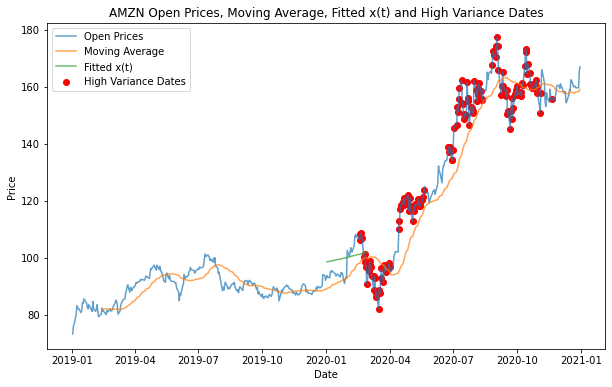

In [12]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Step 1: Data preparation and calculation of moving averages and variances
data = pd.read_csv("AMZN.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Moving_Average'] = data['Open'].rolling(window=30).mean()
data['Moving_Variance'] = data['Open'].rolling(window=30).var()

# Step 2: Calculation of x∞ and x0 for the crisis period
# (Adjust the dates according to the crisis period)
start_pre_crisis = '2019-01-02'
end_pre_crisis = '2019-12-31'
start_crisis = '2020-01-01'
end_crisis = '2020-02-29'

x_infinity = data.loc[(data['Date'] >= start_pre_crisis) & (data['Date'] <= end_pre_crisis), 'Open'].mean()
x0 = data.loc[(data['Date'] >= start_crisis) & (data['Date'] <= end_crisis), 'Open'].mean()

# Step 3: Fitting the data with a harmonic strength
def x_t(t, k):
    return (x0 - x_infinity) * np.exp(-k * t) + x_infinity

time_data = data.loc[(data['Date'] >= start_crisis) & (data['Date'] <= end_crisis)].copy()
time_data['Time'] = np.arange(len(time_data))

popt, _ = curve_fit(x_t, time_data['Time'], time_data['Open'])
best_fit_k = popt[0]

time_data['Fitted'] = x_t(time_data['Time'], best_fit_k)

# Step 4: Identifying and analyzing high-variance periods
threshold = 30
high_variance_dates = data[data['Moving_Variance'] > threshold]['Date']

# (Adjust the code below to analyze each high-variance period separately)
# (Reuse the curve fitting and analysis from Step 3)

# Step 5: Visualizations and interpretation
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Date'], data['Open'], label='Open Prices', alpha=0.7)
ax.plot(data['Date'], data['Moving_Average'], label='Moving Average', alpha=0.7)
ax.plot(time_data['Date'], time_data['Fitted'], label='Fitted x(t)', alpha=0.7)
ax.scatter(high_variance_dates, data.loc[data['Moving_Variance'] > threshold, 'Open'], color='red', label='High Variance Dates')

ax.set_title('AMZN Open Prices, Moving Average, Fitted x(t) and High Variance Dates')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

plt.show()